<a href="https://colab.research.google.com/github/tincorpai/Deep_Learning_Pytorch/blob/master/PythonWorkFlow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

* Get data ready (turn into tensors)

* Build or pick a pretrained model

* Fit the model to the data and make a prediction

* Evaluate the model

* Improve through experimentation

* Save and reload your trined model

## Where to get help?


 * Follow along with the code 

 * Try it for yourself 

 * Press SHIFT + CMD + SPACE to read the docstring 

 * Search for it: use stack overflow

 * Try again 

 * Ask 

#PyTorch Workflow


Let's explore an example PyTorch end-to-end workflow.

Resources:

* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb

* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

* Ask Questions - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [23]:
what_weare_covering = {1:  "data (prepare and load)",
                      2:   "build model",
                      3:    "fitting the model to data (training)",
                      4:    "making predictions and evaluating a model (inferences)",
                      5:    "saving and loading a model",
                      6:    "putting it all together"
                       }
what_weare_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inferences)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [24]:
import torch
from torch import nn #nn contains all of PyTorch's building bloacks for neural networks. 
#it is also a building blocks of graphs. Graphs is reffered to as computational gragh. 
#it is the job of machine learning engineers to combine trc.nn building blocks to build any deep learning frame work.

import matplotlib.pyplot as plt



In [25]:
#check PyTorch version
torch.__version__

'1.13.1+cu116'

##1. Data (preparing and loading)


Data can be almost anything...  in machine learning.

*  Excel spreadsheet
*  Images of any kind

*  Videos (Youtube has lots of data...)

*  Audio like songs or podcasts

*  DNA

*  Text


Machine learning is a game of two parts:
1. Get data into a numerical representations
2. Build a model to learn patterns in that numrical representation.

To showcase this, ley's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

We know these parameters but we want to build a model that will estimate these
**parameters** by building some examples.

In [26]:
# crete *known* parameters 
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #Adds extra dimension.
y  = weight * X + bias 

In [27]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [28]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Three datasets exist in data science: They are

1)  Training set:  Model learns patterns from training set

2)  Validation set:  Tune the model on the validation set

3)  Test set:  The test set examines the model's generalization.


Generalization is the ability for a machine learning model to perform well on data it hasn't seen before.


We want to build a machine learning model on some training data and we want to deploy on applications and production settings and then more data comes in than it has not seen before and it can make decision base on the new data because of the patterns it has learn in the training data.


Let's create a training and test set with our data

In [29]:
#Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [30]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Building a Function to Visualiza Our Data

How might we better visualize our data?

This is where we visualize our dataset.


In [31]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))  #size of the figure 
  
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") #scatter plot of train_data vs train_labels
  
  #Plot test data in green 
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")  #scatter plot of test_data vs test_labels
  
  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") #scatter plot of test_data vs predictions
    
  # Show the legend
  plt.legend(prop={"size": 14});

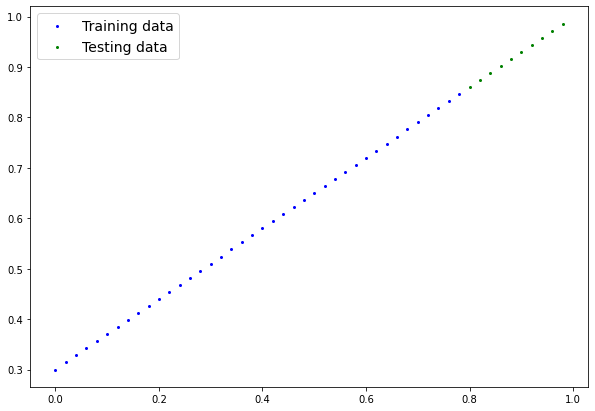

In [32]:
plot_predictions()

We will build a model to learn a pattern of the blue dot so that the x value of the green dot will be able to predict the appropriate y value.

## Creatng Our First PyTorch Model for Linear Regression

Because we will be building classes,the following resources will be useful.

https://realpython.com/python3-object-oriented-programming/


What our model does:
*  Start with random values (weight & bias)
*  Look at training data and adjust the random values to better represent (or get closer to) the ideal values ((The weight & bias values we used to create the data).


How does it do so?

Through two main algorithms:

1) Gradient descents: https://www.youtube.com/watch?v=IHZwWFHWa-w

2) Backpropagation: https://www.youtube.com/watch?v=tIeHLnjs5U8&t=6s

Gradient descent is why we have requires_grad = True. When running the code below, Python will keep track of the gradient of the weight and bias parameters and it will update the parameters through the combination of Gradient descent and back propagation.

it is not necessarilly important to initialize your model with random parameters, you can initialize your model with zeros or use the parameters with another model.

This is called transfer learning. The ideal model will replicate the known parameters

In [33]:
from typing_extensions import Self
from torch import nn
# Create a linear regression model class.

class LinearRegressionModel(nn.Module):
  def __init__(self):
    #<- almost everything in PyTorch is from nn.modules. Your module should subclass this class
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias  = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
    # Forward methor to define the computation in the model
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    # "x" is the input data
    return self.weight * X + self.bias  
    # this is the linear regression formula
    #the forward module is the compuation that the module does. You need to define
    #the forward module if you want to subclass nn.Module. 
    #we pass the data to nn.Module and the forward method will perform the compuation


## PyTorch Modulde Building Essentials 

* torch.nn - contains all of the building blocks for computational grphs (a neural network can be considered a compuational grpah).

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer parameter from torch.nn will set these for us

* torch.nn.Module - The base calss for all neural network modules, if you subclass it, you should overwrite forward() method.

* torch.optim - Otimizers in PyTorch live here, and they will help with gradient descent.

*  def forward() - All nn.Module sublclasses require you to overwrite forward(),
this method defines what happens in the forward computation.

See some essential modules via PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch Model

We can check our model paramters or what is inside our model using .parameters().

In [34]:
#Create a random seed. Because we will want to get the same value everytime 
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [35]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

We need to adjust our weights and bias that we start as random values and we tune the model in order to move the random values to the true parameters values as close as possible to the true value. 

### Making Prediction using `torch.inference_mode()`

To check our model's predictive power, check how well its predicts 'y_test' based on x_test

When we pass data through our model, it is going to run it through the `forward()` method.

In [36]:
#make predictions with model
with torch.inference_mode(): #it turns off inference tracking to maximize space
  y_preds = model_0(X_test) #You can do something similar with torch.no_grad(), 
#however, inference mode is preferred.

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [37]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

For details of the PyTorch inference mode, check out this link:
https://twitter.com/pytorch/status/1437838231505096708

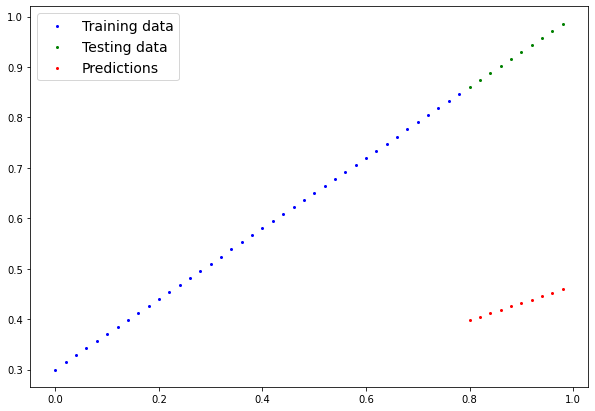

In [38]:
plot_predictions(predictions=y_preds)

The whole idea of training is for a model to move from *unknown* parameters
(these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data. From the model we showcased above, we see that this is a poor representation of our dataset.

One way to measure the representation between your model outputs, in our case the red dot prediction, and the testing data is to use the **loss function**.


Note: Loss function can also be called cost function or criterion in different arears. For this work, we will refer to it as a loss function.


Things we need to train:

*  **Loss function:** A function to measure how wrong your model's prediction is to the ideal outputs. For more information on loss function, checkout this link:https://pytorch.org/docs/stable/nn.html#loss-functions

*  **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias in our case) to improve the loss function.
For getting more information about optimizer, checkout this link:https://pytorch.org/docs/stable/optim.html
     
      Inside the optimizer, you will often set two parameters:
          * params: the model parameters you did like to optimize, for example 
            params = model_0.parameters().

          * lr (learning rate) - the learning rate is a hyperparameter that 
            defines how big/small the optimizer changes the parameters with 
            each step (a small lr results in small changes, a large lr results 
            large changes.



And specifically for PyTorch, we need: 

* A training loop 

* A testing loop

In other words, the loss function takes into account how wrong our model is and the optimizer takes into cognizant the outcome from the loss function and tune or adjust the parameters (weight and bias in the example) to improve the loss 
function.

Hyperparameters is what machine engineers and data scientists set while the parameters is set by the model.

In [39]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [40]:
#Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [46]:
# Setup a loss function
loss_fn = nn.L1Loss()


#Set up an optimizer (stochastic gradient descent) #It's starts by randomly adjusting
#the parameters. Once its founds the random steps that have minimize the loss value
#it is going continue adjusting the parameters in that direction. It may say 
#for instance, if the weight increases, the loss may reduce. And this will continue 
#untill the weight no longer reduce the loss. The smaller the learning rate, the smaller the change in the parameter, 
#the larger the learning rate, the larger the change in the parameter.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)# lr = learning rate = possibly the most important hyperparameter you can set.


The question is, which loss function and optimizer should be used?

A: This is problem specific. But with experience, we will get an idea of what works and what doesn't work with your particular problem set.

For example, for a regression problem (like ours), a loss function of nn.L1Loss() and optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifing whether a photo is a dog or cat, you'll likely want to use a loss function of nn.BCELoss()  (binary cross loss).

## Building a training loop (and a testing loop) in PyTorch 


A couple of things we need in a training loop:
0.  Loop through the data

1.  Forward pass (this involves data moving from the input to the output layer `forward()` functions) to make predictions on data - also called forward propagation.

2. Calculate the loss (compare forward pass  predictions to ground truth labels)

3. Optimizer zero grad 

4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)

5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**).

Note: If the gradient of the loss is zero, then the losss is zero too.

In [114]:
# An epoch is one loop through the data...(this is hyperparameters because we 
#set it ourselves).
epochs = 100

### Training
#0. Loop through the data 
for epoch in range(epochs): #one epoch is a single board pass through the data.
  #Set the model to training mode
  model_0.train()  #train mode in PyTorch set all parameters that require gradients
  #to require gradients. We want to minimize the gradients 
 

  #1.  Forward   #we learn patterns on the training data to evaluate our model on
  #test data
  y_pred = model_0(X_train)

  #2.We want to calculate the loss (different between the our model's training 
  #dataset and the ideal data values).
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")

  #3.  Optimizer zero grad
  optimizer.zero_grad()

  #4.  Perform backpropagation on the loss with respect to the parameter of the 
  #model.
  loss.backward()

  #5.  Step the optimizer (perform gradient descent)
  optimizer.step()  #the optimizer makes some calculation in how to adjust the
   #the model parmeters with regards to the backpropagation of the loss.
   #by default how the optimizer changes will accumulates through the loop... we
   #zero them above in step 3 for the next iteration of the loop. It's function
   #as its updates the step's parameters to further get them closer to the true value
   #if it does that, the loss will closer to zero.


  model_0.eval()    #turn off the different settings in the model not needed for evaluation/testing
  

  #print out model state_dict()
  print(model_0.state_dict())

loss: 0.039933640509843826
OrderedDict([('weight', tensor([0.5028])), ('bias', tensor([0.3818]))])
loss: 0.03958464413881302
OrderedDict([('weight', tensor([0.5046])), ('bias', tensor([0.3813]))])
loss: 0.03923564404249191
OrderedDict([('weight', tensor([0.5064])), ('bias', tensor([0.3808]))])
loss: 0.03888664394617081
OrderedDict([('weight', tensor([0.5082])), ('bias', tensor([0.3803]))])
loss: 0.0385376438498497
OrderedDict([('weight', tensor([0.5100])), ('bias', tensor([0.3798]))])
loss: 0.03818932920694351
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
loss: 0.03785243630409241
OrderedDict([('weight', tensor([0.5134])), ('bias', tensor([0.3783]))])
loss: 0.0375034399330616
OrderedDict([('weight', tensor([0.5152])), ('bias', tensor([0.3778]))])
loss: 0.037164121866226196
OrderedDict([('weight', tensor([0.5168])), ('bias', tensor([0.3768]))])
loss: 0.03681822493672371
OrderedDict([('weight', tensor([0.5186])), ('bias', tensor([0.3763]))])
loss: 0.036475114524

In [117]:
#let's make some predictions
with torch.inference_mode():
  y_pred_new = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Steps in the code above are explained as follow:

1)   Pass the data through a model for a number of epochs
    (e.g. 100 for 100 passes of the data)

2)   Pass the data through the model, this will perform forward() method      located within the model.


3)   We calculate the loss values (how wrong the model predictions are) and this depends what loss function you used, what kind of prediction your is returning and what kind of true value you have.

4) Zero the optimizer to gradients: **Note** The optimizer accumulates gradients over time so that for each epoch, we want them to go back to zero. 
Its accumulate gradient because of compute optimization.
They accumulate every epoch, zero them to start fresh every epoch.

5) Perform backpropagation on the loss function (compute the gradient of every parameter with requires_grad=True)

6) Step the optimizer to update the model's performance with respect to the 
   gradients calculated by loss.backward(). 


**Note** When we are testing we adjust the parameters our models have learnt on the training dataset, se we don't need to do any learnining when testing. We turn off things we do not need.

In [111]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5010])), ('bias', tensor([0.3823]))])

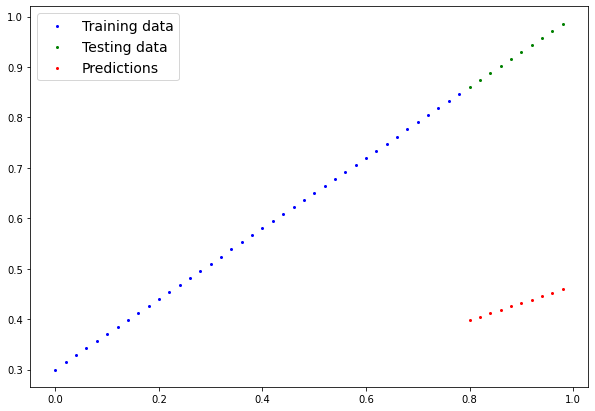

In [112]:
plot_predictions(predictions=y_preds)

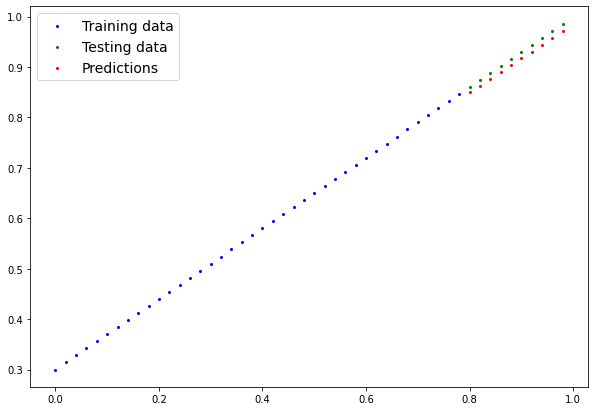

In [118]:
plot_predictions(predictions=y_pred_new)